# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [153]:
import pandas as pd
import geopandas as gp
import numpy as np
import os
import zipfile
from sklearn.cluster import KMeans
import scipy.cluster as scp
from scipy.cluster.hierarchy import fcluster
import pylab as pl

## OBTAIN CENSUS DATA: 1993 DATA MISSING

In [15]:
# download zip files to $PUIDATA
!for i in $(seq 94 99); do \
wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp$i\totals.zip -P $PUIDATA; done
!for i in $(seq 0 9); do \
wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp0$i\totals.zip -P $PUIDATA; done
!for i in $(seq 0 4); do \
wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp1$i\totals.zip -P $PUIDATA; done

--2018-12-07 15:28:21--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp94totals.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611524 (597K) [application/zip]
Saving to: ‘/nfshome/ah4412/PUIdata/zbp94totals.zip’

zbp94totals.zip     100%[===================>] 597.19K  --.-KB/s    in 0.02s   

2018-12-07 15:28:21 (36.1 MB/s) - ‘/nfshome/ah4412/PUIdata/zbp94totals.zip’ saved [611524/611524]

--2018-12-07 15:28:21--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp95totals.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625328 (611K) [application

In [ ]:
# unzip files within $PUIDATA
#!for i in $(seq 94 99); do \
#unzip $PUIDATA/zbp$i\totals.zip -d $PUIDATA; done
#!for i in $(seq 0 9); do \
#unzip $PUIDATA/zbp0$i\totals.zip -d $PUIDATA; done
#!for i in $(seq 0 4); do \
#unzip $PUIDATA/zbp1$i\totals.zip -d $PUIDATA; done

In [65]:
# test on 94 file
fname = 'zbp94totals.zip'
zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/' + fname)
df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
df = df[['zip', 'est']]
df_all = df.rename(columns = {'est' : 'e94'})

In [66]:
df_all.head()

,zip,e94
0,1001,439
1,1002,450
2,1003,10
3,1004,47
4,1005,92


In [68]:
# read in 95-99
for i in range(95, 100):
    fname = 'zbp' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/' + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    # make columns lowercase (some were uppercase)
    df.columns = map(str.lower, df.columns)
    df = df[['zip', 'est']]
    df = df.rename(columns = {'est' : 'e' + str(i)})
    df_all = pd.merge(df_all, df)

In [69]:
# read in 00-09
for i in range(0, 10):
    fname = 'zbp0' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/' + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    # make columns lowercase (some were uppercase)
    df.columns = map(str.lower, df.columns)
    df = df[['zip', 'est']]
    df = df.rename(columns = {'est' : 'e0' + str(i)})
    df_all = pd.merge(df_all, df)

In [70]:
# read in 10-14
for i in range(0, 5):
    fname = 'zbp1' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + '/' + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    # make columns lowercase (some were uppercase)
    df.columns = map(str.lower, df.columns)
    df = df[['zip', 'est']]
    df = df.rename(columns = {'est' : 'e1' + str(i)})
    df_all = pd.merge(df_all, df)

In [71]:
df_all.head()

,zip,e94,e95,e96,e97,e98,e99,e00,e01,e02,...,e05,e06,e07,e08,e09,e10,e11,e12,e13,e14
0,1001,439,439,433,457,444,469,493,490,490,...,509,509,503,477,458,448,436,453,439,458
1,1002,450,467,487,500,490,558,563,587,566,...,589,582,596,584,571,570,558,572,572,560
2,1003,10,10,13,15,14,13,13,13,15,...,12,12,16,17,16,16,16,15,15,18
3,1004,47,48,47,41,31,35,48,37,23,...,31,30,20,18,18,21,19,16,16,13
4,1005,92,95,101,104,95,82,86,90,94,...,94,98,106,97,87,96,91,94,97,97


In [73]:
df_all.shape

(35885, 22)

## OBTAIN NYC ZIPCODES SHAPEFILE

In [79]:
# download to $PUIDATA
!wget -P $PUIDATA https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip

--2018-12-07 16:39:53--  https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip [following]
--2018-12-07 16:39:53--  https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
Reusing existing connection to data.cityofnewyork.us:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘/nfshome/ah4412/PUIdata/application%2Fzip’

application%2Fzip       [    <=>             ]   1.44M  1.93MB/s    in 0.7s    

2018-12-07 16:39:54 (1.93 MB/s) - ‘/nfshome/ah4412/PUIdata/applicati

In [81]:
# unzip within $PUIDATA
!unzip $PUIDATA/application%2Fzip -d $PUIDATA

Archive:  /nfshome/ah4412/PUIdata/application%2Fzip
  inflating: /nfshome/ah4412/PUIdata/ZIP_CODE_040114.shx  
  inflating: /nfshome/ah4412/PUIdata/ZIP_CODE_040114.dbf  
  inflating: /nfshome/ah4412/PUIdata/ZIP_CODE_040114.prj  
  inflating: /nfshome/ah4412/PUIdata/ZIP_CODE_040114.sbn  
  inflating: /nfshome/ah4412/PUIdata/ZIP_CODE_040114.sbx  
  inflating: /nfshome/ah4412/PUIdata/ZIP_CODE_040114.shp  
  inflating: /nfshome/ah4412/PUIdata/ZIP_CODE_040114.shp.xml  


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [84]:
# read in shape file
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [128]:
# pull zipcodes as dataframe
nyczip = nyczipsshp[['ZIPCODE']].astype(int)
nyczip.rename(columns = {'ZIPCODE' : 'zip'}, inplace = True)
nyczip.head()

,zip
0,11436
1,11213
2,11212
3,11225
4,11218


In [129]:
# subset census data to just NYC zipcodes
cbs = pd.merge(nyczip, df_all, on='zip')
cbs.head()

,zip,e94,e95,e96,e97,e98,e99,e00,e01,e02,...,e05,e06,e07,e08,e09,e10,e11,e12,e13,e14
0,11436,51,50,53,51,51,58,65,57,78,...,82,80,84,90,92,98,101,95,99,109
1,11213,406,420,433,456,476,473,477,493,546,...,556,565,556,592,621,675,674,726,755,772
2,11212,505,494,502,527,519,541,520,527,577,...,587,570,587,602,647,699,713,721,731,752
3,11225,381,387,388,410,416,409,417,422,479,...,491,499,514,520,543,580,597,623,673,696
4,11218,985,1015,1049,1075,1118,1149,1161,1180,1228,...,1332,1331,1377,1397,1457,1474,1523,1605,1687,1736


In [132]:
# 20 years of data and 263 zipcodes
cbs = cbs.set_index('zip')
cbs.head()

,e94,e95,e96,e97,e98,e99,e00,e01,e02,e03,...,e05,e06,e07,e08,e09,e10,e11,e12,e13,e14
zip,,,,,,,,,,,,,,,,,,,,,
11436,51,50,53,51,51,58,65,57,78,74,...,82,80,84,90,92,98,101,95,99,109
11213,406,420,433,456,476,473,477,493,546,569,...,556,565,556,592,621,675,674,726,755,772
11212,505,494,502,527,519,541,520,527,577,581,...,587,570,587,602,647,699,713,721,731,752
11225,381,387,388,410,416,409,417,422,479,488,...,491,499,514,520,543,580,597,623,673,696
11218,985,1015,1049,1075,1118,1149,1161,1180,1228,1247,...,1332,1331,1377,1397,1457,1474,1523,1605,1687,1736


In [135]:
# clean all missing values
cleancsb = cbs.dropna()
cleancsb.shape

(243, 21)

In [233]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [234]:
# check means near 0
vals.mean(axis=1).head()

zip
11436   -3.595008e-16
11213   -1.268826e-16
11212    4.652363e-16
11225   -1.903239e-16
11218   -2.537653e-16
dtype: float64

In [235]:
vals.mean(axis=1).shape

(243,)

In [236]:
# check standard deviations of 1
vals.std(axis=1).head()

zip
11436    1.0
11213    1.0
11212    1.0
11225    1.0
11218    1.0
dtype: float64

In [237]:
vals.std(axis=1).shape

(243,)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

## K-means Clustering: Analysis

In [238]:
#cluster with kmeans
km = KMeans(n_clusters=4, random_state=444).fit(vals)

In [239]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(243,)

In [240]:
# five cluster means (21 points to plot along time series for each)
cluster_means = km.cluster_centers_
cluster_means.shape

(4, 21)

In [241]:
# record cluster number for each zipcode
vals['cluster'] = km.labels_
vals.head()

,e94,e95,e96,e97,e98,e99,e00,e01,e02,e03,...,e06,e07,e08,e09,e10,e11,e12,e13,e14,cluster
zip,,,,,,,,,,,,,,,,,,,,,
11436,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853,0
11213,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875,0
11212,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464,0
11225,-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,-0.184704,-0.089324,...,0.027251,0.186217,0.249804,0.493552,0.885668,1.065830,1.341371,1.871258,2.115007,0
11218,-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,-0.357567,-0.270200,...,0.116050,0.327569,0.419533,0.695427,0.773596,0.998909,1.375964,1.753018,1.978331,0


## K-Means Clustering: Plots of Cluster Time Series

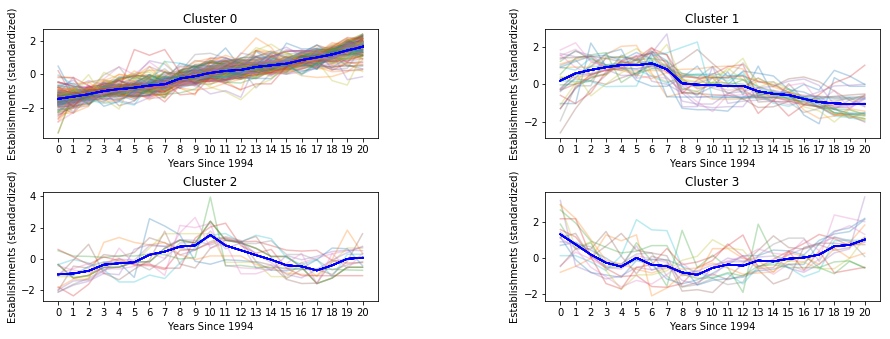

In [259]:
fig, axes = pl.subplots(2, 2, figsize=(15,5))
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
for c,ax in enumerate(fig.axes):
    for i in range(len(vals[vals.cluster == c])):
        ax.plot(range(21), vals[vals.cluster == c].iloc[i,0:21], alpha=0.3)
        ax.plot(range(21), cluster_means[c], 'blue')
        pl.setp(axes, xticks=range(21), xticklabels=range(21))
        ax.set_xlabel('Years Since 1994')
        ax.set_ylabel('Establishments (standardized)')
        ax.set_title('Cluster {}'.format(c))

pl.show()

**Figure 1:** The figure above displays the standardized number of establishments in each of 4 clusters over the years 1994 to 2014. Each line represents a particular NYC zipcode and the blue line represents the cluster center. We can see there are many zipcodes in the first cluster and that these zipcode do not vary much from the pattern of the cluster center, which appears to be trending upward. The other three clusters have fewer zipcodes, more variability around the center, and differing structures.

## K-means Clustering: Map of Clusters

//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
//anaconda/lib/python2.7/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


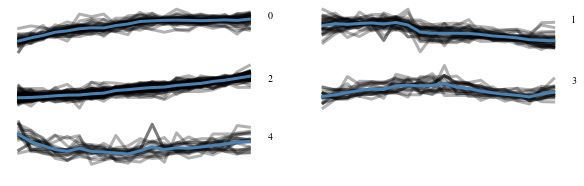

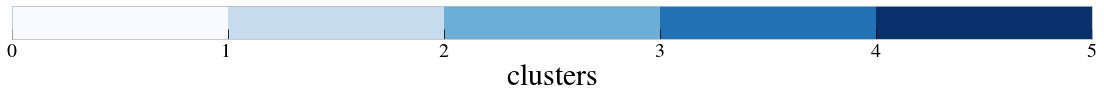

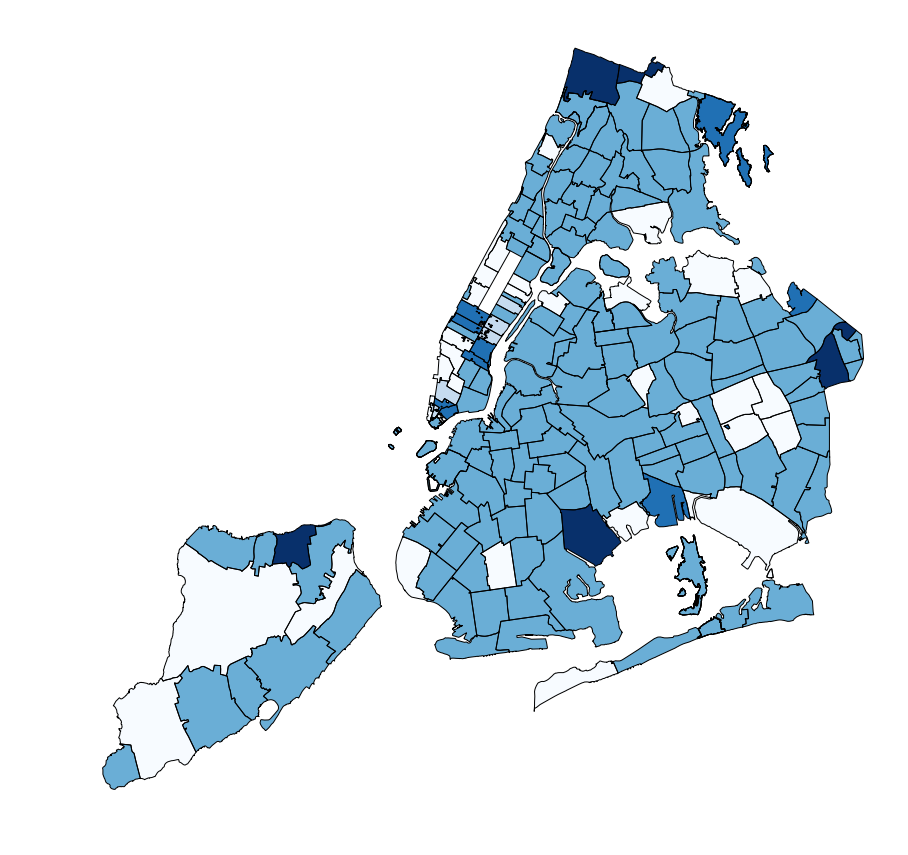

In [16]:
...

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

(905410.75604293647,
 1075212.5382562787,
 112386.35181947277,
 280345.45402395504)

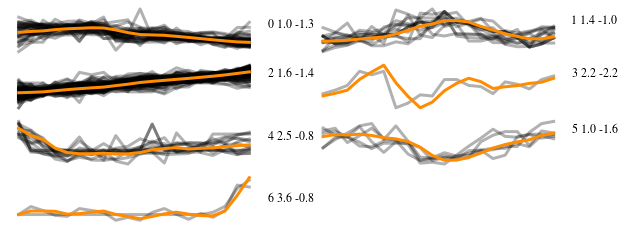

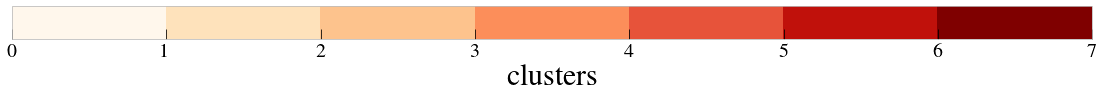

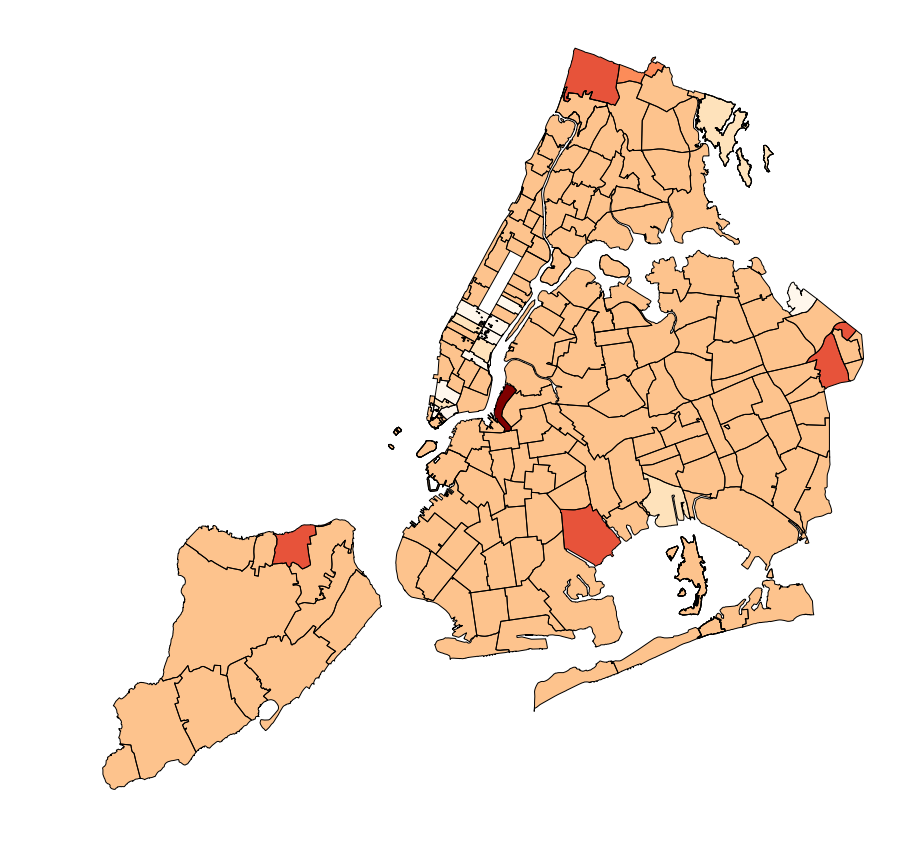

In [29]:
...

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [ ]:
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit()
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))



### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

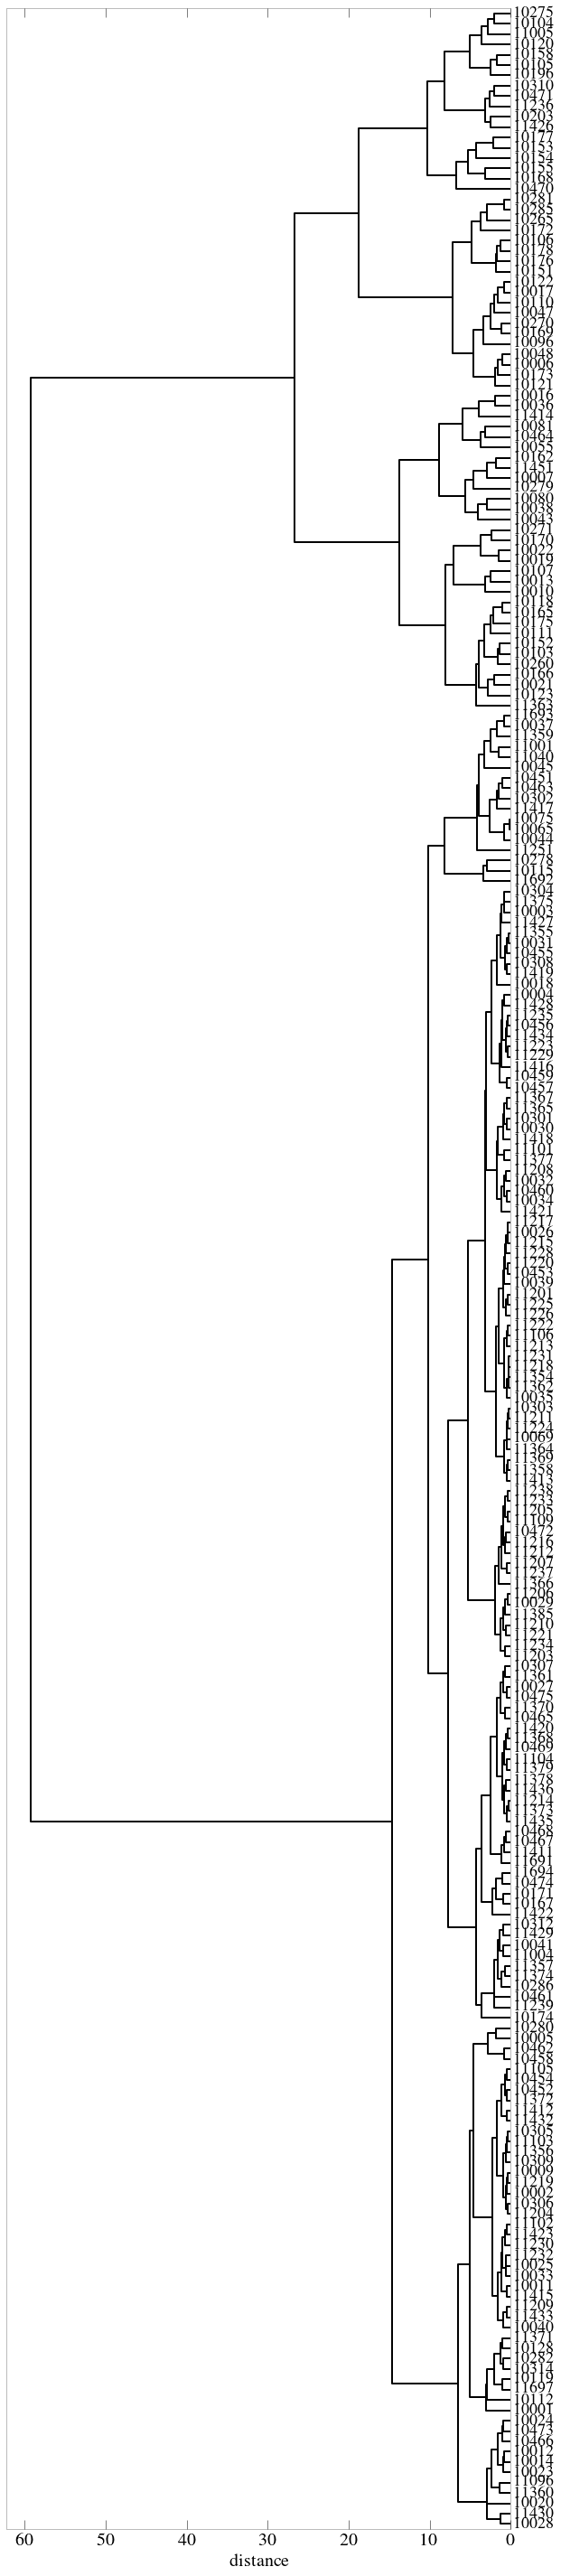

In [1]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [20]:
!pwd

/nfshome/fb55/PUI2017_fb55/HW11_fb55
